# EDA

## 1.Importar paquetes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew, kurtosis, f_oneway

## 2.Carga de los datos

In [3]:
ruta = 'C:/Users/matia/OneDrive/Escritorio/Asteroid_Classification'

In [4]:
datos = 'trabajo_resultado_calidad.pickle'

In [5]:
ruta_completa = ruta + '/02_Datos/03_Trabajo/' + datos
df = pd.read_pickle(ruta_completa)

In [6]:
num = ['H', 'diameter', 'albedo','diameter_sigma', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp','tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
cat = ['pha', 'class']

## 3. Analisis estadistico

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spkid,88292.0,2.153282e+06,1.311716e+05,2.000001e+06,2.044516e+06,2.114402e+06,2.240091e+06,2.539759e+06
H,88292.0,1.504616e+01,1.331944e+00,3.400000e+00,1.440000e+01,1.520000e+01,1.590000e+01,2.290000e+01
diameter,88292.0,5.750410e+00,9.818393e+00,8.300000e-02,2.931000e+00,4.148000e+00,5.972000e+00,9.394000e+02
albedo,88292.0,1.348911e-01,1.125021e-01,1.000000e-03,5.400000e-02,8.100000e-02,2.000000e-01,1.000000e+00
diameter_sigma,88292.0,4.777132e-01,8.568135e-01,3.000000e-03,1.750000e-01,3.210000e-01,6.130000e-01,1.400000e+02
e,88292.0,1.435945e-01,7.364268e-02,3.094994e-04,8.949653e-02,1.378775e-01,1.891557e-01,9.683957e-01
a,88292.0,2.815932e+00,5.951860e-01,6.262100e-01,2.548085e+00,2.755614e+00,3.094442e+00,6.635270e+01
q,88292.0,2.416063e+00,5.164663e-01,8.181996e-02,2.080125e+00,2.376833e+00,2.695444e+00,4.031871e+01
i,88292.0,9.860502e+00,6.452417e+00,2.205988e-02,4.865190e+00,8.977301e+00,1.320230e+01,1.703346e+02
om,88292.0,1.691474e+02,1.024615e+02,1.565173e-03,8.206362e+01,1.598267e+02,2.539218e+02,3.599932e+02


In [19]:
print('Asimetria y Kurtosis: ')
for var in num:
    print(f'{var:<15} Skew: {skew(df[var].dropna()):>6.2f} | Kurtosis: {kurtosis(df[var].dropna()):>6.2f}')

Asimetria y Kurtosis: 
H               Skew:  -1.04 | Kurtosis:   3.52
diameter        Skew:  27.23 | Kurtosis: 1853.06
albedo          Skew:   1.61 | Kurtosis:   3.64
diameter_sigma  Skew:  73.04 | Kurtosis: 9698.98
e               Skew:   1.12 | Kurtosis:   5.22
a               Skew:  27.92 | Kurtosis: 2138.36
q               Skew:   7.90 | Kurtosis: 390.06
i               Skew:   1.29 | Kurtosis:   6.48
om              Skew:   0.20 | Kurtosis:  -1.11
w               Skew:  -0.03 | Kurtosis:  -1.21
ma              Skew:  -0.06 | Kurtosis:  -1.23
ad              Skew:  47.96 | Kurtosis: 4995.03
n               Skew:   5.59 | Kurtosis: 108.89
tp              Skew:  -3.39 | Kurtosis: 206.00
tp_cal          Skew:  -3.17 | Kurtosis: 187.55
per             Skew: 100.20 | Kurtosis: 15551.36
per_y           Skew: 100.20 | Kurtosis: 15551.36
moid            Skew:   8.11 | Kurtosis: 399.01
moid_ld         Skew:   8.11 | Kurtosis: 399.01
sigma_e         Skew: 208.66 | Kurtosis: 51358.94
sigma_a

In [24]:
def detectar_outliers(df, lista):
    outliers_count = {}
    for col in lista:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outliers_count[col] = len(outliers)
    return pd.Series(outliers_count).sort_values(ascending = False)

In [25]:
outliers = detectar_outliers(df, num)
print('Cantidad de outliers por variable: ')
outliers

Cantidad de outliers por variable: 


sigma_tp          8122
sigma_ma          7752
sigma_om          7656
sigma_w           7052
diameter          6389
sigma_q           6127
sigma_ad          6103
sigma_e           6060
sigma_a           5954
sigma_per         5919
sigma_n           5904
sigma_i           5222
diameter_sigma    4758
H                 2720
i                 2719
ad                2246
a                 2184
per               2162
per_y             2162
n                 1883
rms               1842
albedo            1757
q                 1640
moid_ld           1571
moid              1571
e                  745
tp_cal             157
tp                 150
ma                   0
w                    0
om                   0
dtype: int64

In [7]:
def coef_variacion(df, lista):
    return (df[lista]. std() / df[lista].mean()).sort_values(ascending = False)

In [8]:
cv = coef_variacion(df, num)
print('Coeficiente de variacion (std / mean): ')
cv

Coeficiente de variacion (std / mean): 


sigma_per         221.414497
sigma_ad          198.360788
sigma_a           187.154893
sigma_tp           58.792471
sigma_q            16.876777
sigma_e             5.838396
sigma_ma            2.827426
sigma_om            2.123211
sigma_n             2.070402
sigma_w             2.023583
diameter_sigma      1.793573
diameter            1.707425
albedo              0.834022
i                   0.654370
om                  0.605753
per                 0.601733
per_y               0.601733
ma                  0.571148
w                   0.569545
e                   0.512852
sigma_i             0.512335
moid_ld             0.358852
moid                0.358852
ad                  0.246673
n                   0.245241
q                   0.213764
a                   0.211364
rms                 0.100616
H                   0.088524
tp_cal              0.000718
tp                  0.000211
dtype: float64

In [10]:
for var in num:
    grupos = [grupos.dropna() for _, grupos in df.groupby('class')[var]]
    stat, p = f_oneway(*grupos)
    print(f'ANOVA para {var}: F = {stat:.2f}, p = {p:.4f}')

ANOVA para H: F = 933.56, p = 0.0000
ANOVA para diameter: F = 1118.27, p = 0.0000
ANOVA para albedo: F = 652.16, p = 0.0000
ANOVA para diameter_sigma: F = 4182.04, p = 0.0000
ANOVA para e: F = 1293.16, p = 0.0000
ANOVA para a: F = 20096.17, p = 0.0000
ANOVA para q: F = 10436.36, p = 0.0000
ANOVA para i: F = 379.52, p = 0.0000
ANOVA para om: F = 2.35, p = 0.0091
ANOVA para w: F = 1.20, p = 0.2874
ANOVA para ma: F = 56.81, p = 0.0000
ANOVA para ad: F = 18395.55, p = 0.0000
ANOVA para n: F = 7965.41, p = 0.0000
ANOVA para tp: F = 474.13, p = 0.0000
ANOVA para tp_cal: F = 452.18, p = 0.0000
ANOVA para per: F = 32071.48, p = 0.0000
ANOVA para per_y: F = 32071.48, p = 0.0000
ANOVA para moid: F = 10158.38, p = 0.0000
ANOVA para moid_ld: F = 10158.38, p = 0.0000
ANOVA para sigma_e: F = 6173.57, p = 0.0000
ANOVA para sigma_a: F = 4960.74, p = 0.0000
ANOVA para sigma_q: F = 7450.48, p = 0.0000
ANOVA para sigma_i: F = 387.52, p = 0.0000
ANOVA para sigma_om: F = 11.85, p = 0.0000
ANOVA para sigma_

## 4. Analisis grafico

### 4.1 Histogramas

In [21]:
def histogramas(df, lista):
    n = len(lista)
    rows = math.ceil(n / 2)
    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()
    for i, var in enumerate(lista):
        sns.histplot(df[var], bins = 50, kde = True, color = 'steelblue', ax = axes[i])
        axes[i].set_title(var)
        axes[i].set_ylabel('Frecuencia')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

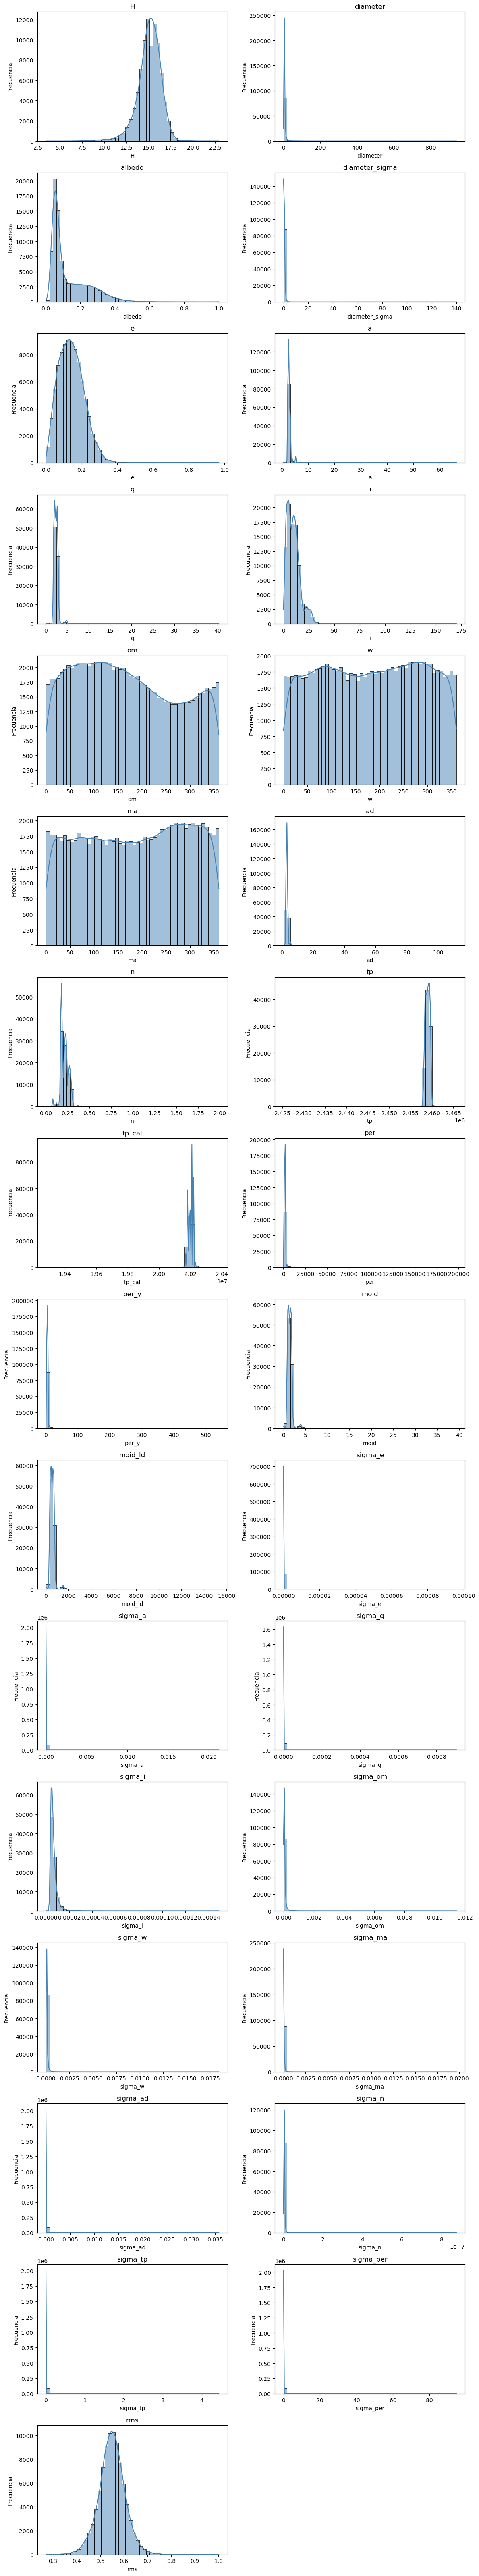

In [22]:
histogramas(df, num)

In [23]:
def boxplots(df, lista):
    n = len(lista)
    rows = math.ceil(n / 2)
    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()
    for i, var in enumerate(lista):
        sns.boxplot(x = df[var], color = 'salmon', ax = axes[i])
        axes[i].set_title(f'Boxplot de {var}')
        axes[i].set_xlabel(var)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

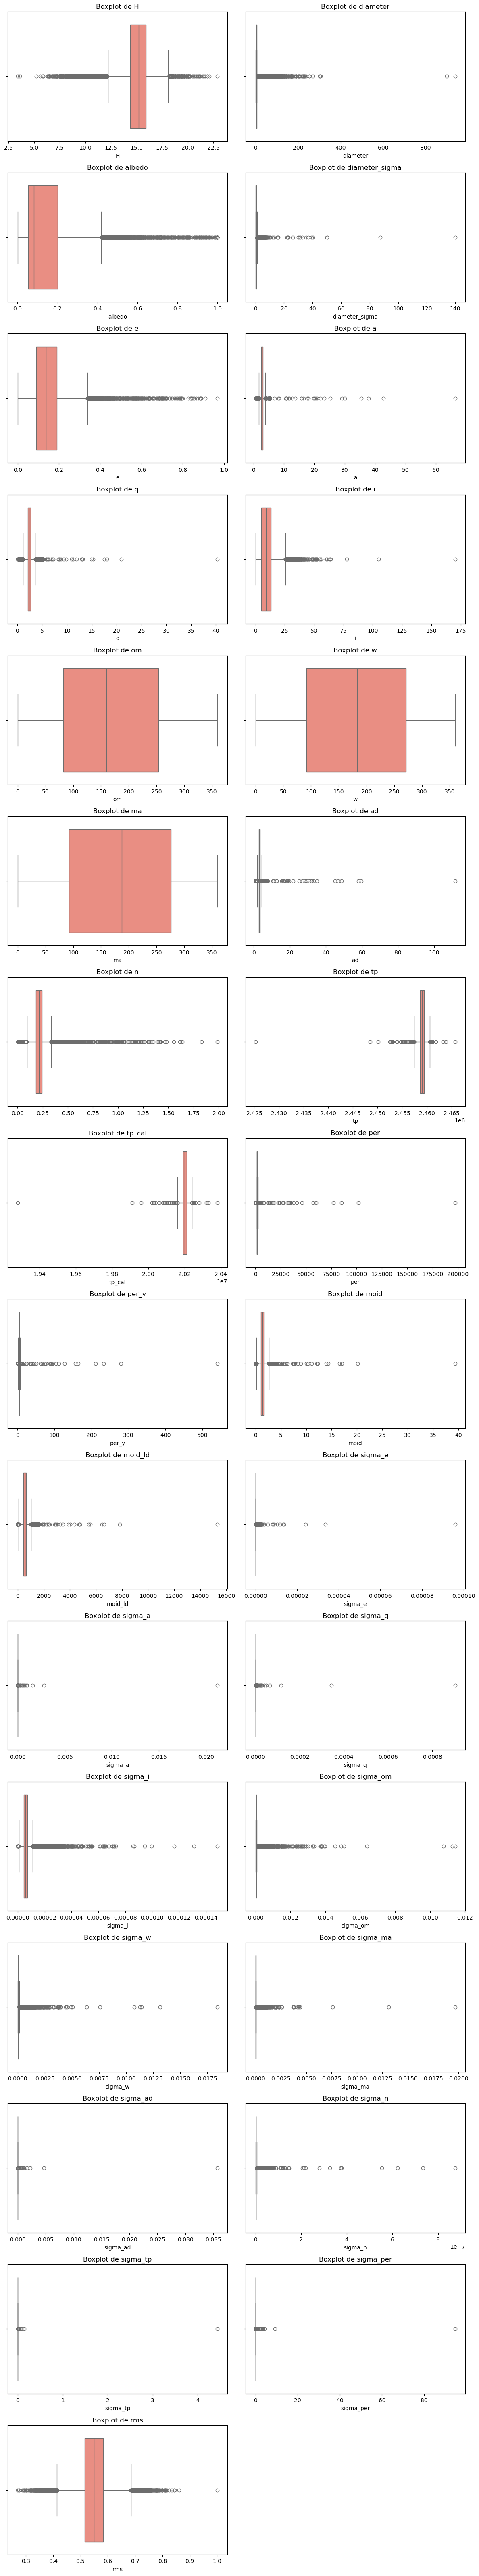

In [24]:
boxplots(df, num)

In [25]:
def countplots(df, lista):
    n = len(lista)
    rows = math.ceil(n / 2)
    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()
    for i, var in enumerate(lista):
        sns.countplot(x=df[var], palette= 'viridis', order = df[var].value_counts().index, ax = axes[i])
        axes[i].set_title(f'Frecuencia de {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Cantidad')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\568886382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette= 'viridis', order = df[var].value_counts().index, ax = axes[i])
C:\Users\matia\AppData\Local\Temp\ipykernel_9792\568886382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette= 'viridis', order = df[var].value_counts().index, ax = axes[i])


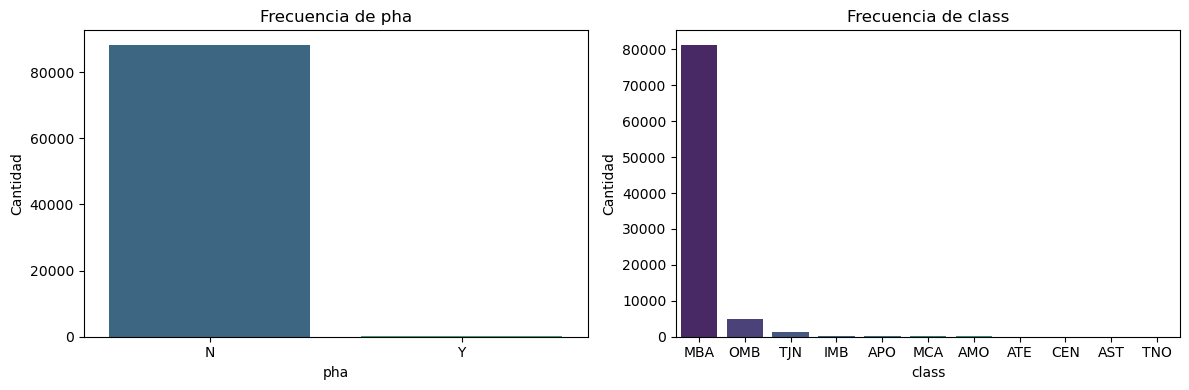

In [26]:
countplots(df, cat)

In [27]:
vars_pairplot = ['H', 'diameter', 'albedo', 'e', 'a', 'i']

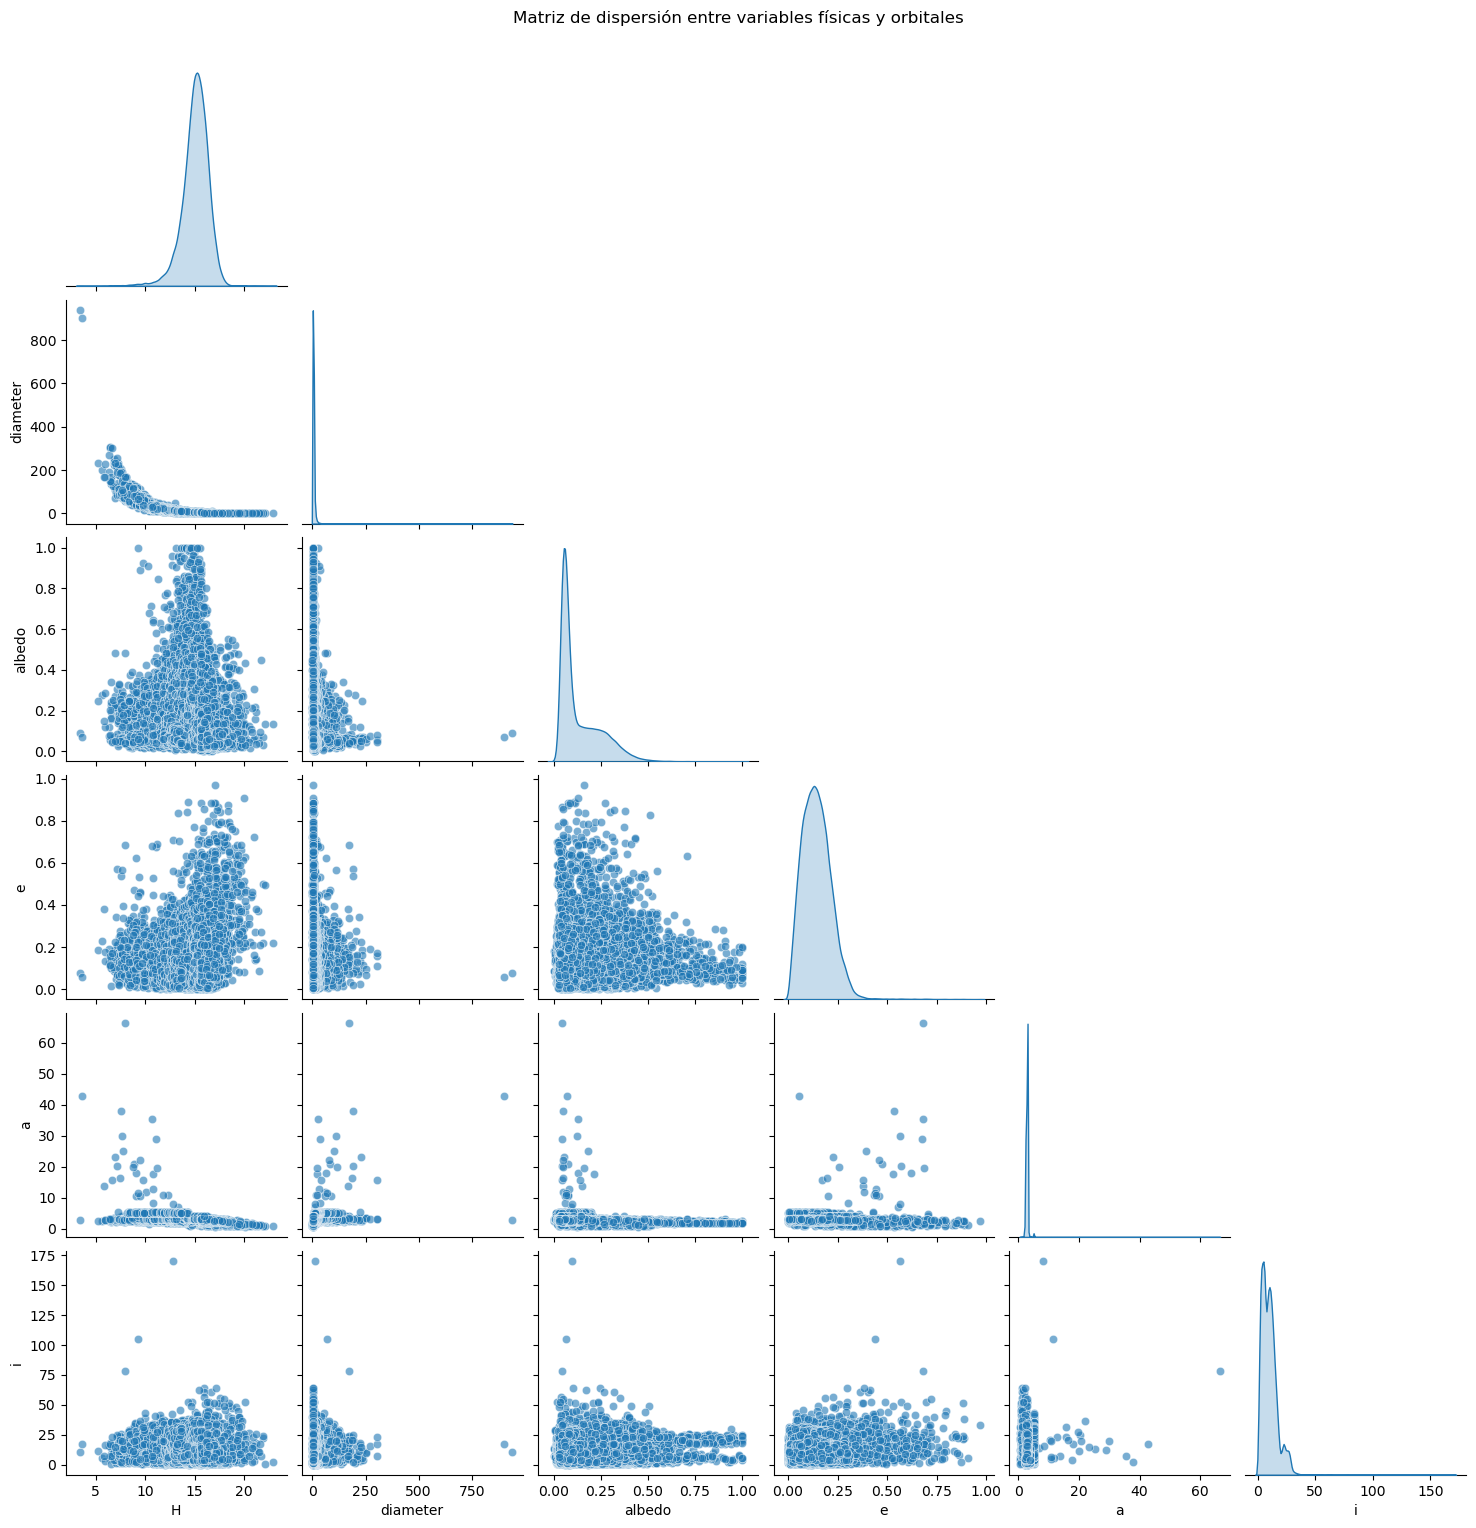

In [29]:
sns.pairplot(df[vars_pairplot], diag_kind = 'kde', corner = True, plot_kws = {'alpha':0.6})
plt.suptitle('Matriz de dispersión entre variables físicas y orbitales', y = 1.02)
plt.show()

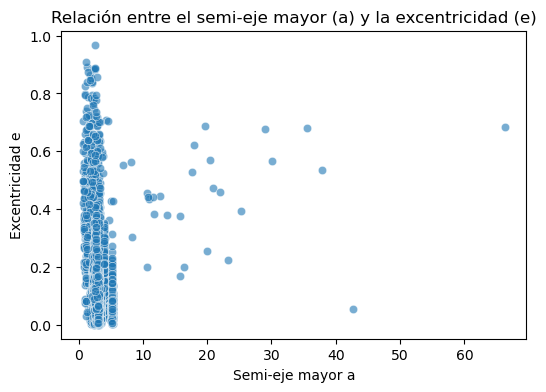

In [30]:
plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = 'a', y = 'e', alpha = 0.6)
plt.title('Relación entre el semi-eje mayor (a) y la excentricidad (e)')
plt.xlabel('Semi-eje mayor a')
plt.ylabel('Excentricidad e')
plt.show()

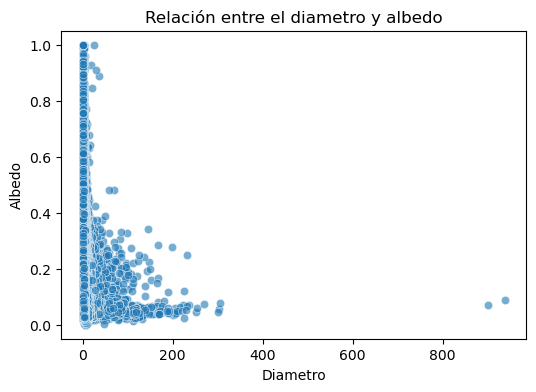

In [31]:
plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = 'diameter', y = 'albedo', alpha = 0.6)
plt.title('Relación entre el diametro y albedo')
plt.xlabel('Diametro')
plt.ylabel('Albedo')
plt.show()

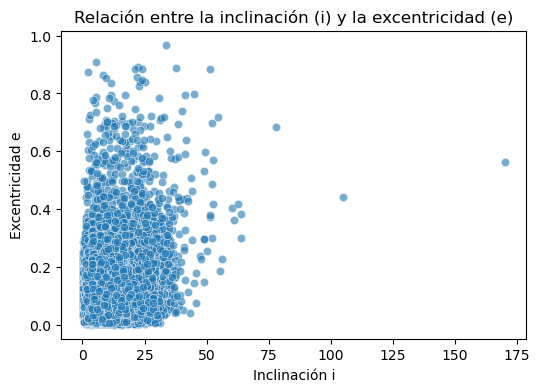

In [32]:
plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = 'i', y = 'e', alpha = 0.6)
plt.title('Relación entre la inclinación (i) y la excentricidad (e)')
plt.xlabel('Inclinación i')
plt.ylabel('Excentricidad e')
plt.show()

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\1920890217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'class', y = var, palette = 'pastel')


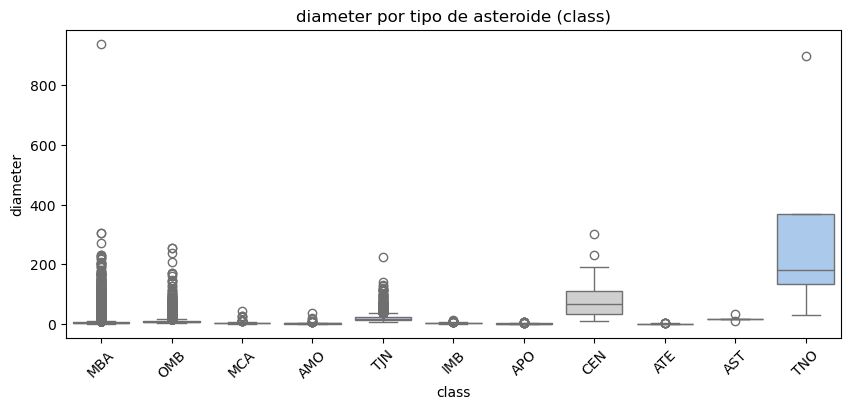

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\1920890217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'class', y = var, palette = 'pastel')


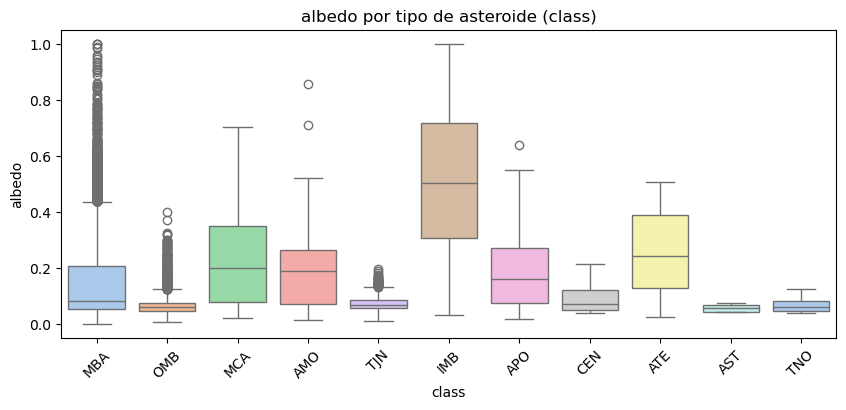

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\1920890217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'class', y = var, palette = 'pastel')


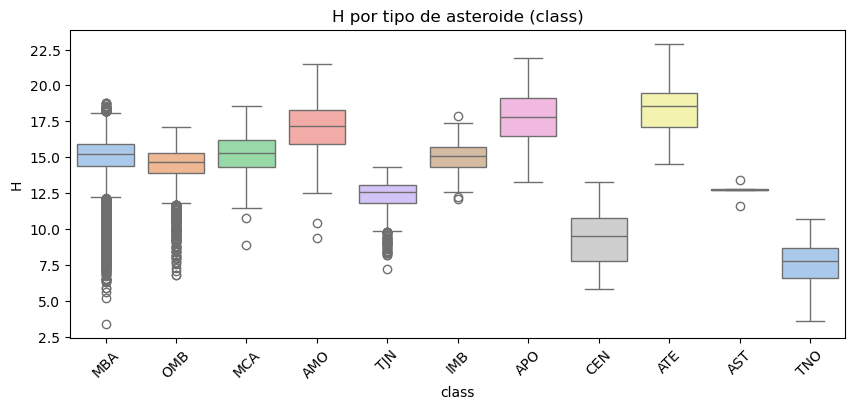

In [33]:
for var in ['diameter', 'albedo', 'H']:
    plt.figure(figsize = (10, 4))
    sns.boxplot(data = df, x = 'class', y = var, palette = 'pastel')
    plt.title(f'{var} por tipo de asteroide (class)')
    plt.xlabel('class')
    plt.ylabel(var)
    plt.xticks(rotation = 45)
    plt.show()

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\3672689793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'pha', y = var, palette = 'pastel')


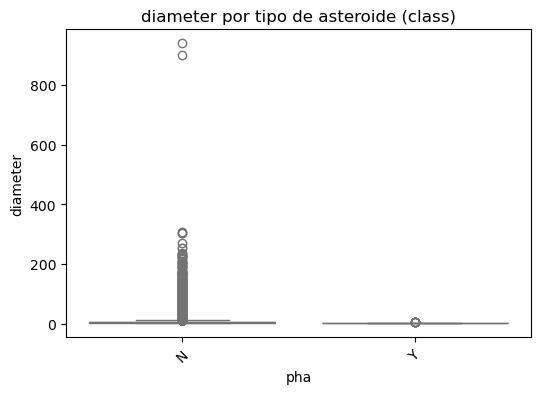

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\3672689793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'pha', y = var, palette = 'pastel')


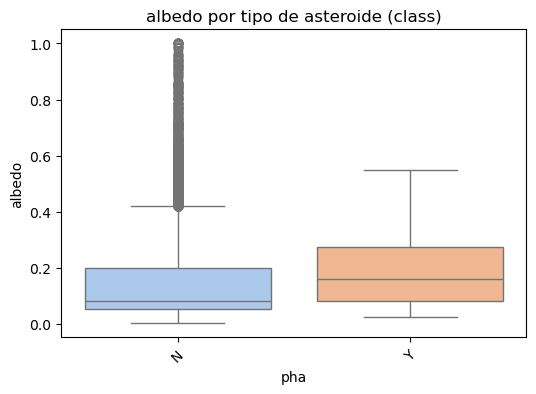

C:\Users\matia\AppData\Local\Temp\ipykernel_9792\3672689793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'pha', y = var, palette = 'pastel')


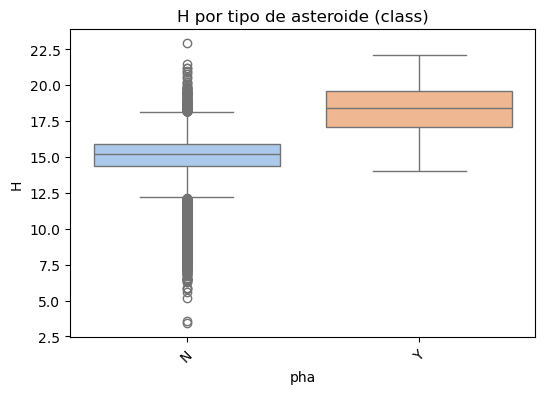

In [34]:
for var in ['diameter', 'albedo', 'H']:
    plt.figure(figsize = (6, 4))
    sns.boxplot(data = df, x = 'pha', y = var, palette = 'pastel')
    plt.title(f'{var} por tipo de asteroide (class)')
    plt.xlabel('pha')
    plt.ylabel(var)
    plt.xticks(rotation = 45)
    plt.show()

C:\Users\matia\AppData\Local\Temp\ipykernel_9308\2177329829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'class', y =var, palette = 'Set3', cut = 0)


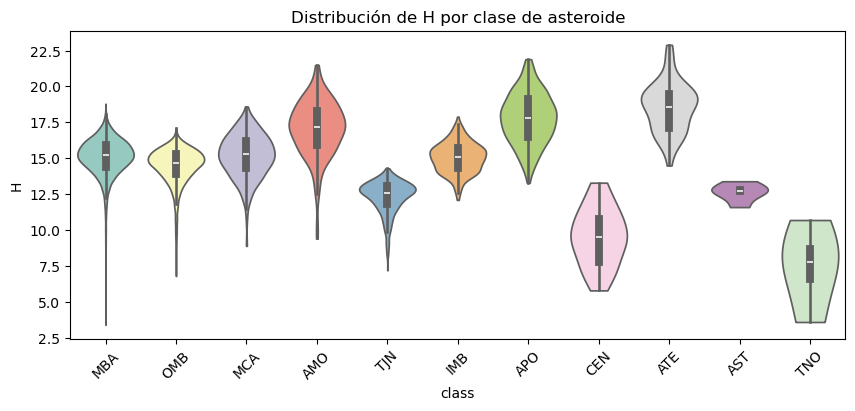

C:\Users\matia\AppData\Local\Temp\ipykernel_9308\2177329829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'class', y =var, palette = 'Set3', cut = 0)


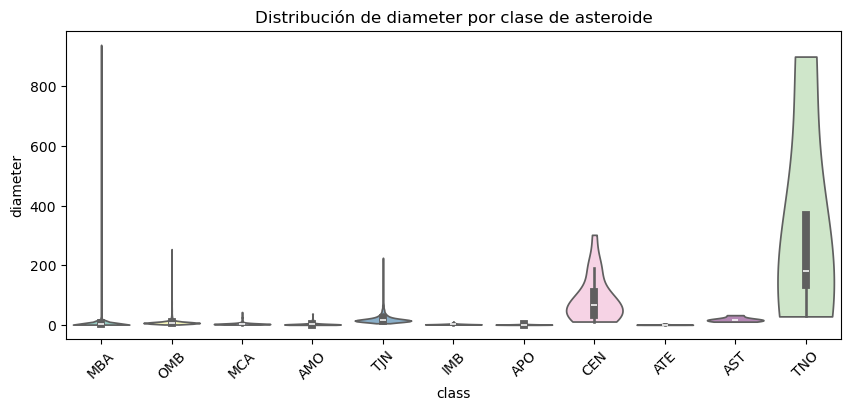

C:\Users\matia\AppData\Local\Temp\ipykernel_9308\2177329829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'class', y =var, palette = 'Set3', cut = 0)


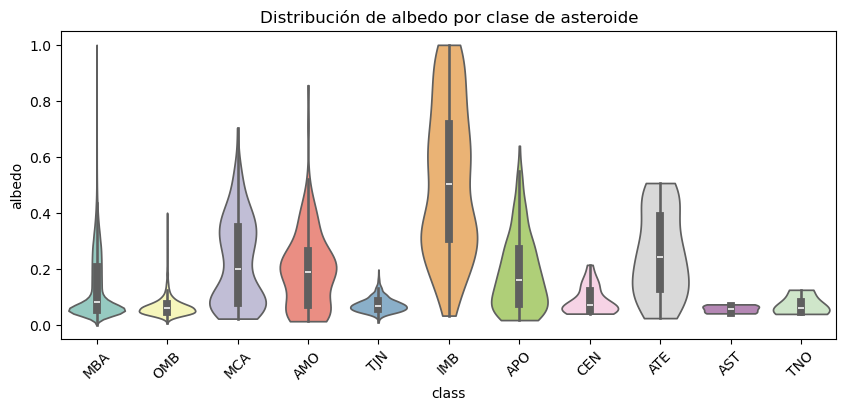

C:\Users\matia\AppData\Local\Temp\ipykernel_9308\2177329829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'class', y =var, palette = 'Set3', cut = 0)


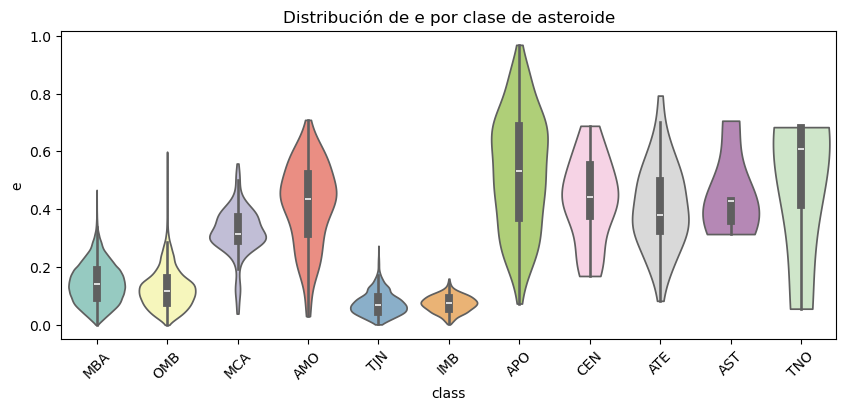

In [5]:
for var in ['H', 'diameter', 'albedo', 'e']:
    plt.figure(figsize = (10, 4))
    sns.violinplot(data = df, x = 'class', y =var, palette = 'Set3', cut = 0)
    plt.title(f'Distribución de {var} por clase de asteroide')
    plt.xlabel('class')
    plt.ylabel(var)
    plt.xticks(rotation = 45)
    plt.show()

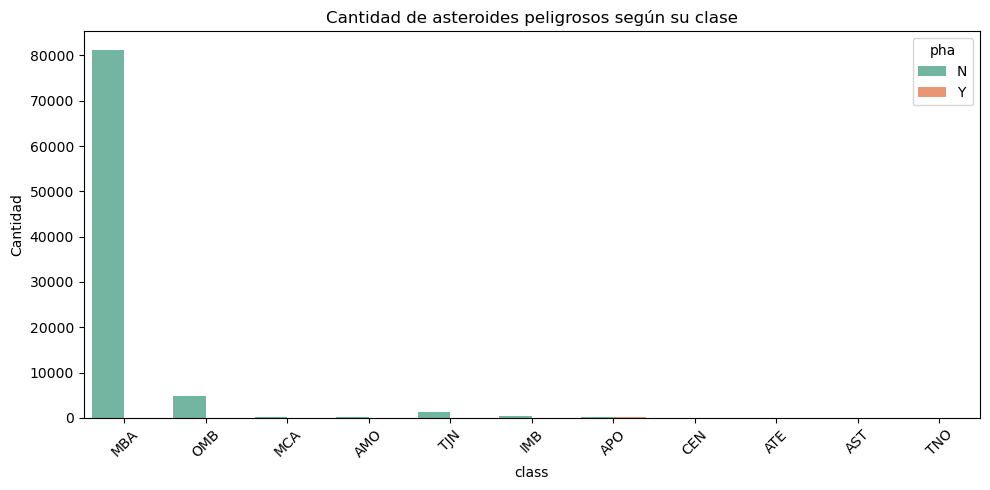

In [5]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'class', hue = 'pha', palette = 'Set2')
plt.title('Cantidad de asteroides peligrosos según su clase')
plt.xlabel('class')
plt.ylabel('Cantidad')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

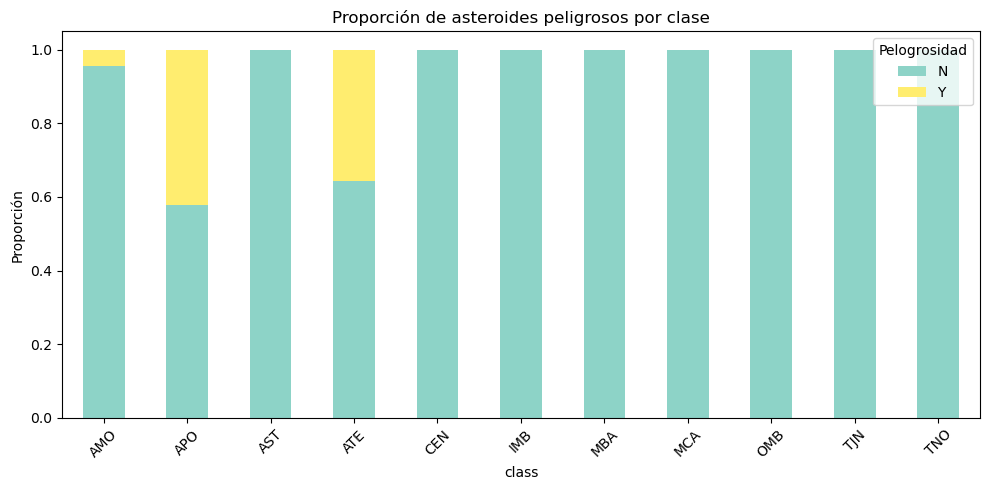

In [7]:
tabla = df.groupby(['class', 'pha']).size().unstack(fill_value = 0)

tabla_prop = tabla.div(tabla.sum(axis = 1), axis = 0)

tabla_prop.plot(kind = 'bar', stacked = True, figsize = (10, 5), colormap = 'Set3')
plt.title('Proporción de asteroides peligrosos por clase')
plt.xlabel('class')
plt.ylabel('Proporción')
plt.legend(title = 'Pelogrosidad', loc = 'upper right')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

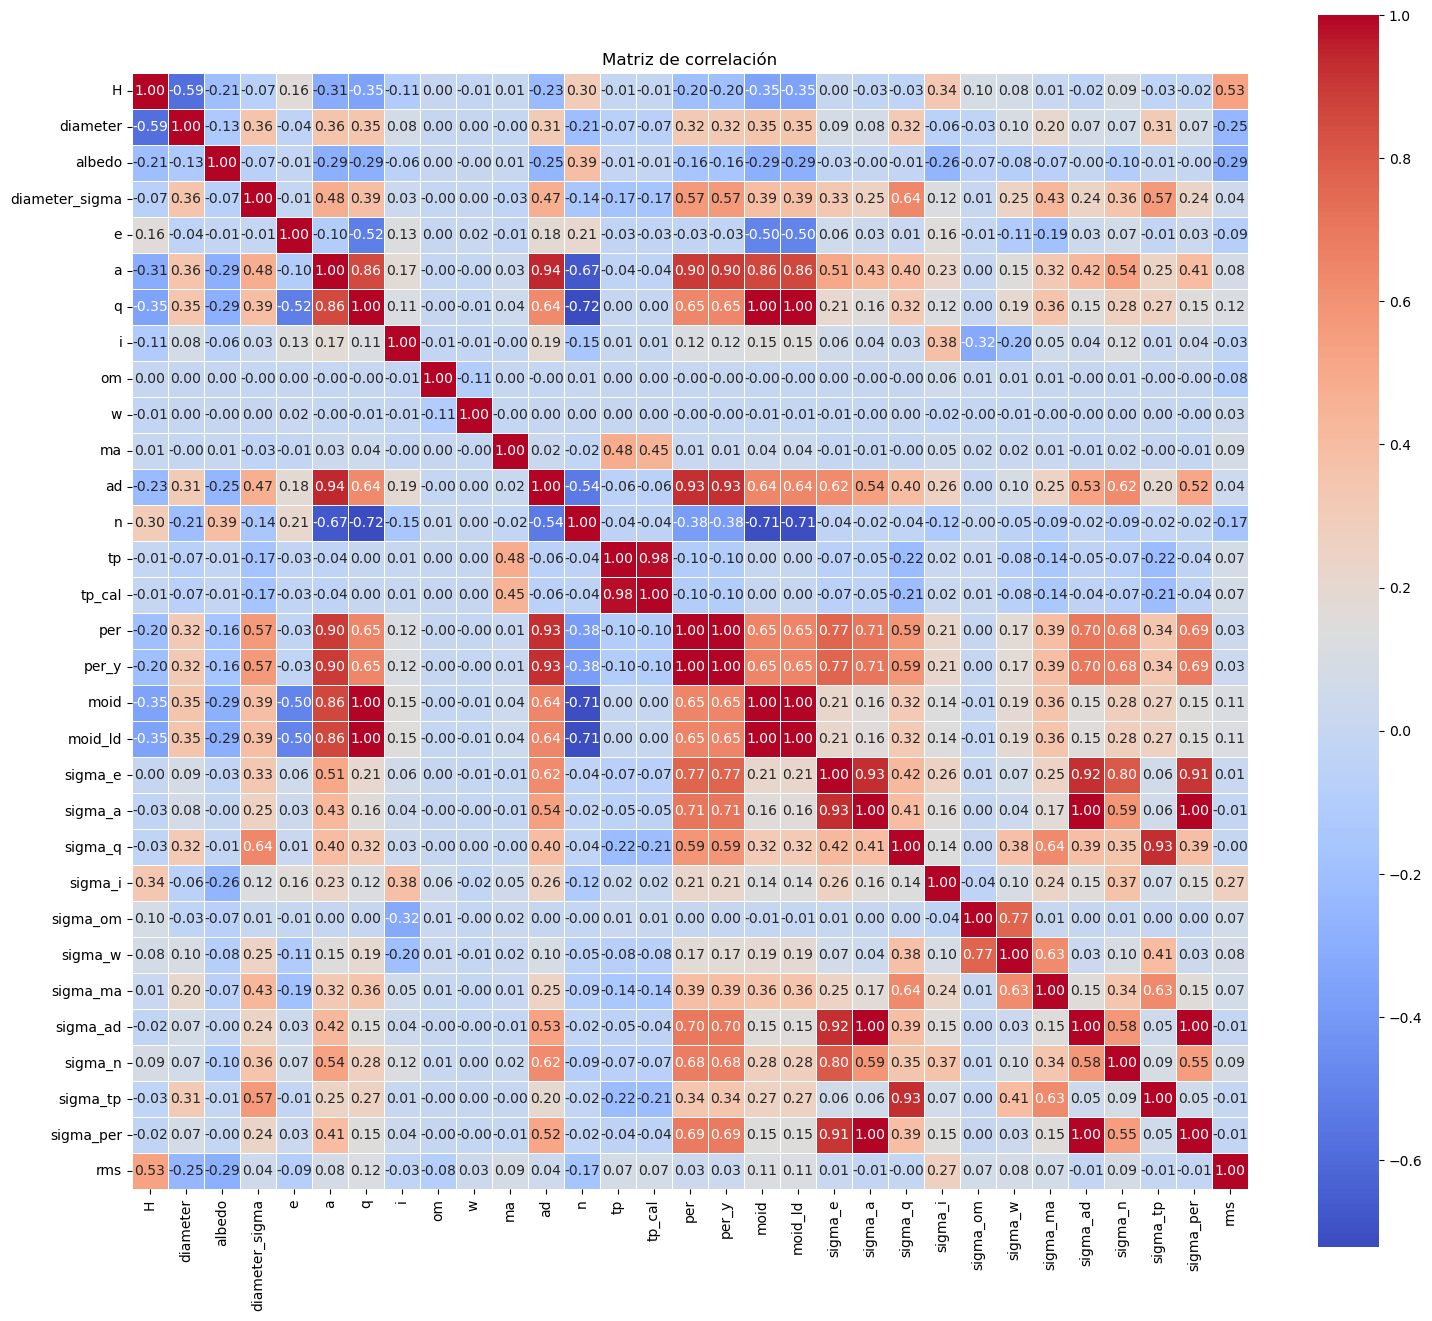

In [13]:
corr = df[num].corr()

plt.figure(figsize = (18, 16))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm', square = True, linewidths = 0.5)
plt.title('Matriz de correlación')
plt.show()